<a href="https://colab.research.google.com/github/l-Monarch-l/Laborat/blob/main/%D0%9B%D0%B0%D0%B13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve
import seaborn as sns

In [30]:
# Параметры классов SCP
scp_classes = {
    'Safe': {'danger_range': (1, 2), 'anomaly_range': (1, 3)},
    'Euclid': {'danger_range': (2, 4), 'anomaly_range': (3, 6)},
    'Keter': {'danger_range': (4, 5), 'anomaly_range': (6, 10)},
    'Thaumiel': {'danger_range': (0, 1), 'anomaly_range': (7, 10)},
    'Neutralized': {'danger_range': (0, 0), 'anomaly_range': (0, 2)}
}

# Типы SCP-объектов
entity_types = ['Гуманоид', 'Животное', 'Растение', 'Механизм', 'Абстракция', 'Структура']

In [31]:
data = []
for i in range(1000):
    scp_class = random.choice(list(scp_classes.keys()))
    params = scp_classes[scp_class]

    # Генерация характеристик
    danger = random.randint(*params['danger_range'])
    anomaly = random.randint(*params['anomaly_range'])
    cost = random.randint(1000, 1000000)
    sentient = random.choice([0, 1])
    entity = random.choice(entity_types)

    # Определение необходимости протокола
    emergency = int(
        (scp_class == 'Keter' and danger >= 4) or
        (scp_class == 'Euclid' and danger >= 3 and sentient) or
        (cost > 800000 and danger >= 3) or
        (entity == 'Гуманоид' and danger >= 3) or
        (entity == 'Абстракция' and danger >= 2)
    )

    data.append([
        f"SCP-{i+1000:04d}",
        scp_class,
        cost,
        danger,
        sentient,
        entity,
        anomaly,
        emergency
    ])

In [32]:
# Создание DataFrame
df = pd.DataFrame(data, columns=[
    'SCP_ID', 'Класс', 'Стоимость_содержания', 'Уровень_опасности',
    'Разумность', 'Тип_объекта', 'Уровень_аномалии', 'Аварийный_протокол'
])

In [33]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        """Инициализация сети со случайными весами"""
        np.random.seed(42)
        # Веса между входным и скрытым слоем
        self.weights1 = np.random.randn(input_size, hidden_size) * 0.1
        # Веса между скрытым и выходным слоем
        self.weights2 = np.random.randn(hidden_size, output_size) * 0.1
        # Смещения (bias)
        self.bias1 = np.zeros((1, hidden_size))
        self.bias2 = np.zeros((1, output_size))

    def relu(self, x):
        """Функция активации ReLU"""
        return np.maximum(0, x)

    def sigmoid(self, x):
        """Функция активации Sigmoid"""
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        """Прямой проход данных через сеть"""
        self.hidden = self.relu(np.dot(X, self.weights1) + self.bias1)
        self.output = self.sigmoid(np.dot(self.hidden, self.weights2) + self.bias2)
        return self.output

    def backward(self, X, y, output, lr):
        """Обратное распространение ошибки"""
        # Ошибка на выходе
        error = y - output
        # Градиент выходного слоя
        delta_output = error * (output * (1 - output))
        # Ошибка скрытого слоя
        error_hidden = delta_output.dot(self.weights2.T)
        # Градиент скрытого слоя
        delta_hidden = error_hidden * (self.hidden > 0)

        # Обновление весов
        self.weights2 += self.hidden.T.dot(delta_output) * lr
        self.weights1 += X.T.dot(delta_hidden) * lr
        # Обновление смещений
        self.bias2 += np.sum(delta_output, axis=0) * lr
        self.bias1 += np.sum(delta_hidden, axis=0) * lr

    def train(self, X, y, epochs=1000, lr=0.01, verbose=True):
        """Обучение сети"""
        losses = []
        accuracies = []

        for epoch in range(epochs):
            # Прямой проход
            output = self.forward(X)
            # Обратное распространение
            self.backward(X, y, output, lr)

            # Расчет метрик
            loss = np.mean(np.square(y - output))
            accuracy = np.mean((output > 0.5) == y)
            losses.append(loss)
            accuracies.append(accuracy)

            if verbose and epoch % 100 == 0:
                print(f"Эпоха {epoch}: Потери={loss:.4f}, Точность={accuracy:.2%}")

        # Визуализация обучения
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(losses)
        plt.title('Динамика потерь')
        plt.xlabel('Эпоха')
        plt.ylabel('Ошибка')

        plt.subplot(1, 2, 2)
        plt.plot(accuracies)
        plt.title('Динамика точности')
        plt.xlabel('Эпоха')
        plt.ylabel('Точность')
        plt.show()

    def predict(self, X, threshold=0.5):
        """Предсказание класса"""
        return (self.forward(X) > threshold).astype(int)

In [34]:
# Преобразование категориальных признаков
class_mapping = {'Safe':0, 'Euclid':1, 'Keter':2, 'Thaumiel':3, 'Neutralized':4}
entity_mapping = {t:i for i,t in enumerate(entity_types)}

df['Класс'] = df['Класс'].map(class_mapping)
df['Тип_объекта'] = df['Тип_объекта'].map(entity_mapping)

In [35]:
# Нормализация числовых признаков
numeric_cols = ['Стоимость_содержания', 'Уровень_опасности', 'Уровень_аномалии']
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())

In [36]:
# Разделение данных
X = df[['Класс', 'Стоимость_содержания', 'Уровень_опасности', 'Разумность', 'Тип_объекта', 'Уровень_аномалии']].values
y = df['Аварийный_протокол'].values.reshape(-1, 1)

In [37]:
# Разделение на обучающую и тестовую выборки
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

Эпоха 0: Потери=0.2486, Точность=65.00%
Эпоха 100: Потери=0.0623, Точность=92.38%
Эпоха 200: Потери=0.0569, Точность=91.88%
Эпоха 300: Потери=0.0494, Точность=93.00%
Эпоха 400: Потери=0.0453, Точность=94.00%
Эпоха 500: Потери=0.0449, Точность=94.12%
Эпоха 600: Потери=0.0448, Точность=94.12%
Эпоха 700: Потери=0.0448, Точность=94.12%
Эпоха 800: Потери=0.0447, Точность=94.12%
Эпоха 900: Потери=0.0447, Точность=94.12%


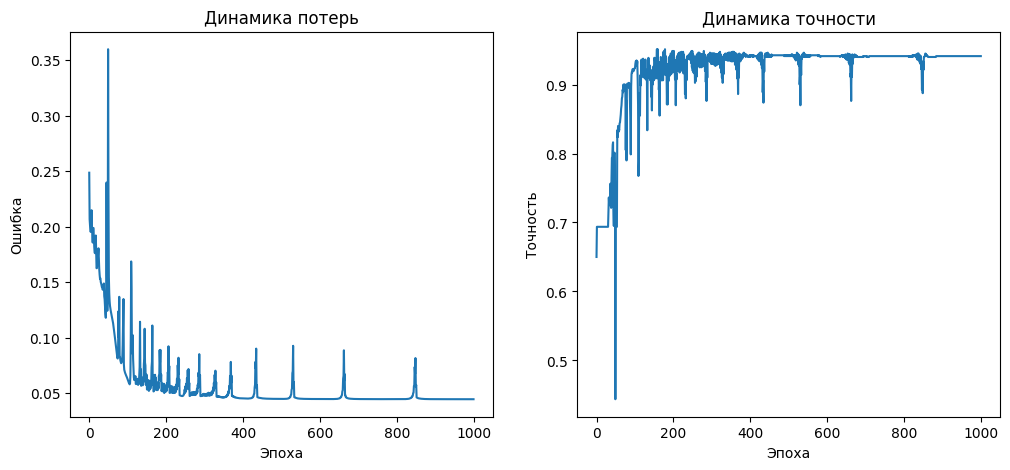

In [38]:
# Создание и обучение сети
nn = NeuralNetwork(input_size=6, hidden_size=6, output_size=1)
nn.train(X_train, y_train, epochs=1000, lr=0.01)

In [40]:
# Оценка на тестовых данных
y_pred = nn.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"\nТочность на тестовых данных: {accuracy:.2%}")


Точность на тестовых данных: 97.50%


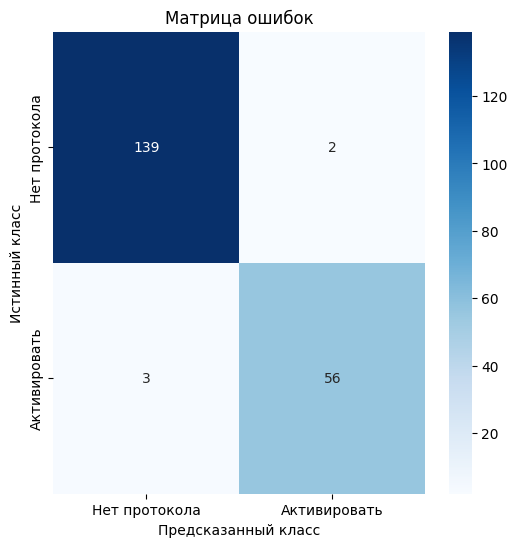

In [41]:
# 1. Матрица ошибок
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Нет протокола', 'Активировать'],
                yticklabels=['Нет протокола', 'Активировать'])
    plt.title('Матрица ошибок')
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

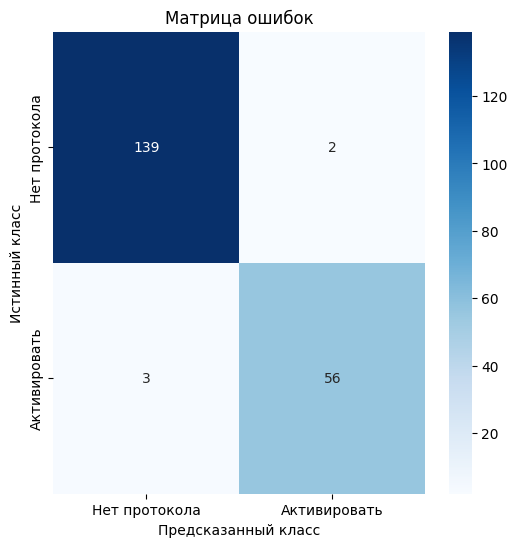

In [42]:
# 1. Матрица ошибок
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Нет протокола', 'Активировать'],
                yticklabels=['Нет протокола', 'Активировать'])
    plt.title('Матрица ошибок')
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

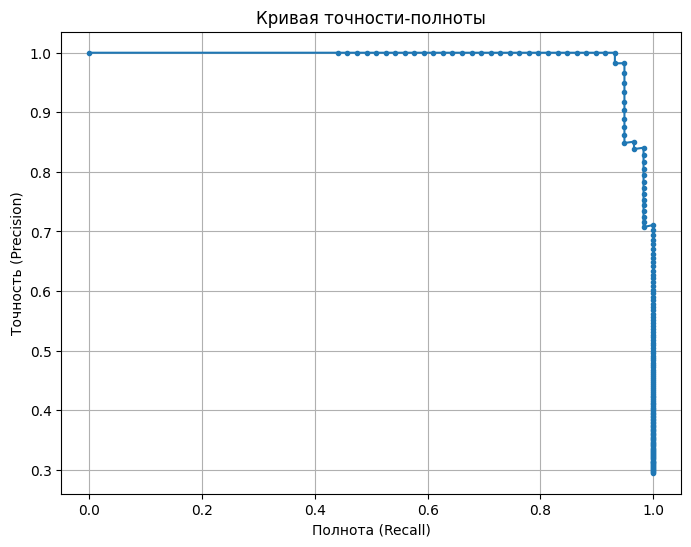

In [43]:
# 2. Кривая Precision-Recall
def plot_pr_curve(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Полнота (Recall)')
    plt.ylabel('Точность (Precision)')
    plt.title('Кривая точности-полноты')
    plt.grid()
    plt.show()

y_scores = nn.forward(X_test)
plot_pr_curve(y_test, y_scores)

In [44]:
# 3. Важность признаков
def plot_feature_importance(weights, feature_names):
    importance = np.mean(np.abs(weights), axis=1)
    plt.figure(figsize=(10, 5))
    plt.barh(feature_names, importance)
    plt.title('Важность признаков')
    plt.xlabel('Средняя величина веса')
    plt.ylabel('Признак')
    plt.show()

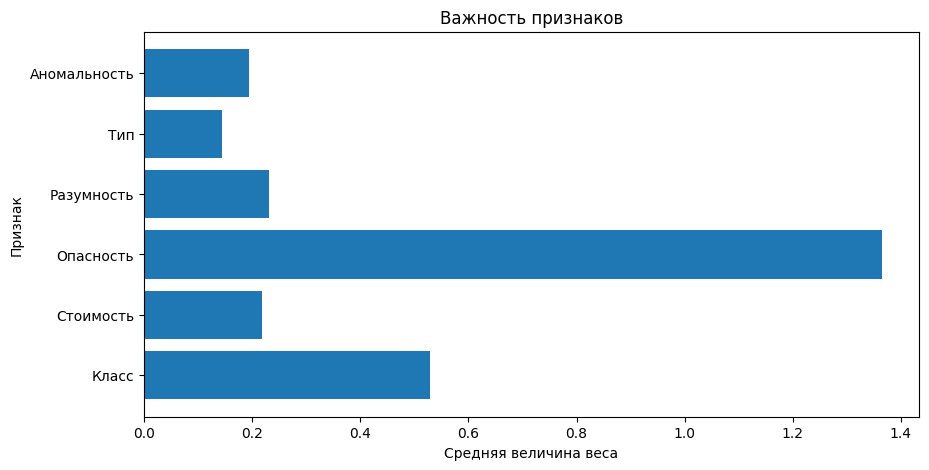

In [45]:
feature_names_ru = ['Класс', 'Стоимость', 'Опасность', 'Разумность', 'Тип', 'Аномальность']
plot_feature_importance(nn.weights1, feature_names_ru)

In [52]:
# Словарь для обратного преобразования классов
reverse_class = {v:k for k,v in class_mapping.items()}
reverse_entity = {v:k for k,v in entity_mapping.items()}

In [58]:
def interpret_prediction(model, sample):
    """Функция для интерпретации предсказания"""
    # Получаем вероятности и класс
    proba = model.forward(sample)[0][0]
    predicted_class = 'Активировать протокол' if proba > 0.5 else 'Без протокола'

    # Преобразуем числовые значения обратно в категории
    scp_class = reverse_class[sample[0][0]]
    entity_type = reverse_entity[sample[0][4]]

    # Выводим информацию об объекте
    print(f"\nSCP-объект класса {scp_class} ({entity_type}):")
    print(f"- Стоимость содержания: {sample[0][1]*100:.0f}% от максимальной")
    print(f"- Уровень опасности: {sample[0][2]*5:.1f}/5")
    print(f"- Разумность: {'Да' if sample[0][3] else 'Нет'}")
    print(f"- Уровень аномальности: {sample[0][5]*10:.1f}/10")

    # Результат предсказания
    print(f"\nВероятность нарушения условий содержания: {proba:.2%}")
    print(f"Рекомендация: {predicted_class}")

In [59]:
# Пример 1: Опасный Keter-объект
sample_keter = np.array([[class_mapping['Keter'], 0.9, 0.8, 1,
                         entity_mapping['Гуманоид'], 0.9]])
interpret_prediction(nn, sample_keter)

# Пример 2: Безопасный Safe-объект
sample_safe = np.array([[class_mapping['Safe'], 0.1, 0.1, 0,
                        entity_mapping['Механизм'], 0.2]])
interpret_prediction(nn, sample_safe)

# Пример 3: Пограничный Euclid-объект
sample_euclid = np.array([[class_mapping['Euclid'], 0.7, 0.6, 1,
                          entity_mapping['Животное'], 0.5]])
interpret_prediction(nn, sample_euclid)

# Пример 4: Thaumiel-объект (особый случай)
sample_thaumiel = np.array([[class_mapping['Thaumiel'], 0.95, 0.1, 1,
                            entity_mapping['Абстракция'], 0.95]])
interpret_prediction(nn, sample_thaumiel)

# Пример 5: Neutralized-объект
sample_neutral = np.array([[class_mapping['Neutralized'], 0.01, 0.0, 0,
                           entity_mapping['Структура'], 0.05]])
interpret_prediction(nn, sample_neutral)

# Пример 6: Сомнительный случай
sample_ambiguous = np.array([[class_mapping['Euclid'], 0.4, 0.3, 0,
                             entity_mapping['Растение'], 0.4]])
interpret_prediction(nn, sample_ambiguous)


SCP-объект класса Keter (Гуманоид):
- Стоимость содержания: 90% от максимальной
- Уровень опасности: 4.0/5
- Разумность: Да
- Уровень аномальности: 9.0/10

Вероятность нарушения условий содержания: 97.00%
Рекомендация: Активировать протокол

SCP-объект класса Safe (Механизм):
- Стоимость содержания: 10% от максимальной
- Уровень опасности: 0.5/5
- Разумность: Нет
- Уровень аномальности: 2.0/10

Вероятность нарушения условий содержания: 0.09%
Рекомендация: Без протокола

SCP-объект класса Euclid (Животное):
- Стоимость содержания: 70% от максимальной
- Уровень опасности: 3.0/5
- Разумность: Да
- Уровень аномальности: 5.0/10

Вероятность нарушения условий содержания: 79.33%
Рекомендация: Активировать протокол

SCP-объект класса Thaumiel (Абстракция):
- Стоимость содержания: 95% от максимальной
- Уровень опасности: 0.5/5
- Разумность: Да
- Уровень аномальности: 9.5/10

Вероятность нарушения условий содержания: 0.35%
Рекомендация: Без протокола

SCP-объект класса Neutralized (Структура):
